In [1]:
import pandas as pd
import sklearn
pd.options.display.max_columns = 10000
experiments = []

In [2]:
dfall = pd.read_csv('portland_housing.csv.gz')
dfall

/tmp/ipykernel_29340/2049606831.py:1: DtypeWarning: Columns (20,50,161,200) have mixed types. Specify dtype option on import or set low_memory=False.
  dfall = pd.read_csv('portland_housing.csv.gz')


abbreviatedAddress address/city  address/zipcode  bathrooms  \
0      2860 NE Blossom Hill Rd     Fairview            97024        3.0   
1        20386 NE Mackenzie Ln     Fairview            97024        3.0   
2              1121 SW 10th Dr      Gresham            97080        3.0   
3           19309 NE Glisan St     Portland            97230        1.0   
4             25-65 NW 20th St      Gresham            97030        3.0   
...                        ...          ...              ...        ...   
25726         7600 SW Erica Pl    Beaverton            97008        2.0   
25727       7275 SW Palmer Way    Beaverton            97007        3.0   
25728    (Undisclosed Address)    Beaverton            97008        2.0   
25729         7250 SW 70th Ave     Portland            97223        2.0   
25730         6655 SW 67th Ave     Portland            97223        3.0   

       bedrooms                          brokerageName      dateSold  \
0           3.0                                    NaN  1.621560e+12   
1           3.0    Harcourts Real Estate Network Group  1.619140e+12   
2           4.0               ERA Freeman & Associates  1.622760e+12   
3           3.0           Premiere Property Group, LLC  1.622760e+12   
4           6.0                                    NaN  1.622510e+12   
...         ...                                    ...           ...   
25726       3.0  Keller Williams Realty Portland Elite  1.595290e+12   
25727       4.0   Keller Williams Realty Professionals  1.595200e+12   
25728       2.0                 Opendoor Brokerage LLC  1.622760e+12   
25729       3.0                                    NaN  1.599000e+12   
25730       4.0                 iPropertiesNW.com, LLC  1.598310e+12   

       daysOnZillow                                        description  \
0              25.0  2860 NE Blossom Hill Rd, Fairview, OR 97024 is...   
1              53.0  Cute as a button 3bed/2.5bath home with brand ...   
2              11.0  What a wonderful large home at end of quiet cu...   
3              11.0                                                NaN   
4              14.0  25-65 NW 20th St, Gresham, OR 97030 is a apart...   
...             ...                                                ...   
25726         363.0  Perfectly nestled back from the Cul-de-sac roa...   
25727         364.0  Contemporary Dream Home Backing To Lowami Hart...   
25728          45.0  This Beaverton two-story cul-de-sac home offer...   
25729         320.0  Close-in yet feels like the country. Large lot...   
25730         328.0  Gorgeous lot backs to Hideaway Park and is ove...   

       favoriteCount     homeStatus       homeType  lastSoldPrice   latitude  \
0                NaN  RECENTLY_SOLD      TOWNHOUSE         315400  45.543571   
1                NaN  RECENTLY_SOLD  SINGLE_FAMILY         400000  45.547585   
2                NaN  RECENTLY_SOLD  SINGLE_FAMILY         512000  45.488228   
3                1.0  RECENTLY_SOLD  SINGLE_FAMILY         348000  45.526634   
4                NaN  RECENTLY_SOLD      APARTMENT         510000  45.511238   
...              ...            ...            ...            ...        ...   
25726            NaN  RECENTLY_SOLD  SINGLE_FAMILY         415000  45.465111   
25727            1.0  RECENTLY_SOLD  SINGLE_FAMILY         615000  45.467197   
25728            NaN  RECENTLY_SOLD      TOWNHOUSE         380000        NaN   
25729            NaN  RECENTLY_SOLD  SINGLE_FAMILY          57997  45.467545   
25730            NaN  RECENTLY_SOLD  SINGLE_FAMILY         585000  45.471767   

       livingArea   longitude  lotSize  pageViewCount postingContact/name  \
0          1806.0 -122.441765   1555.0           47.0                 NaN   
1          1518.0 -122.453224   3484.0            4.0        Julie Murray   
2          2724.0 -122.444420   9583.0          153.0      Michelle Haage   
3          1217.0 -122.464088  13939.0           32.0       Greg Whistler   
4          

In [3]:
numsamples = 10000
df = dfall.sample(numsamples)
sample_rownums = df.index.values
df

abbreviatedAddress address/city  address/zipcode  \
20598  22842 SW Forest Creek Dr UNIT 203     Sherwood            97140   
12042                    824 SW Canby St     Portland            97219   
4917            2237 SW Humphrey Park Rd     Portland            97221   
13600                  1695 NW 137th Ave     Portland            97229   
1113                   1588 NE Barnes Ln      Gresham            97030   
...                                  ...          ...              ...   
12840          617 SW Trillium Creek Ter     Portland            97225   
18060                       2136 5th Ave    West Linn            97068   
12064                   6888 NE 13th Ave     Portland            97211   
20662                  15775 SW 88th Ave       Tigard            97224   
4010                   5802 NE Weller Ct    Hillsboro            97124   

       bathrooms  bedrooms                             brokerageName  \
20598        3.0       2.0           Keller Williams Sunset Corridor   
12042        4.0       4.0  Keller Williams Realty Portland Premiere   
4917         5.0       5.0                      Coldwell Banker Bain   
13600        3.0       4.0                             John L. Scott   
1113         2.0       3.0                  John L. Scott /PTL Metro   
...          ...       ...                                       ...   
12840        3.0       3.0                        Living Room Realty   
18060        4.0       4.0                   Soldera Properties, Inc   
12064        3.0       3.0                                Where, Inc   
20662        2.0       3.0      Keller Williams Realty Professionals   
4010         6.0       4.0                                       NaN   

           dateSold  daysOnZillow  \
20598  1.617240e+12          71.0   
12042  1.616370e+12         126.0   
4917   1.601340e+12         297.0   
13600  1.601600e+12         297.0   
1113   1.609980e+12         196.0   
...             ...           ...   
12840  1.620690e+12          76.0   
18060  1.604020e+12         269.0   
12064  1.624920e+12          27.0   
20662  1.594250e+12         337.0   
4010   1.602200e+12         285.0   

                                             description  favoriteCount  \
20598  Beautiful, freshly updated Sherwood townhome i...            NaN   
12042  Burlingame traditional with abundant potential...            1.0   
4917   This Custom Estate is a Showstopper that prove...            NaN   
13600  PROPERTY IS SALE PENDING, OPEN HOUSES CANCELLE...            0.0   
1113   Cute, Clean 1 level home on Culdesac in a quie...            NaN   
...                                                  ...            ...   
12840  Modern Peterkort Woods townhome with classic d...            NaN   
18060  Custom Home in Sought After Willamette Neighbo...            0.0   
12064  Welcoming end unit features many upgrades. Thi...            0.0   
20662  Reviewing Offers Sat 6/6 @ 5:30pm. OFFERS DEAD...            NaN   
4010   5802 NE Weller Ct, Hillsboro, OR 97124 is a si...            NaN   

          homeStatus       homeType  lastSoldPrice   latitude  livingArea  \
20598  RECENTLY_SOLD      TOWNHOUSE         284000  45.354652      1126.0   
12042  RECENTLY_SOLD  SINGLE_FAMILY         605000  45.468792      4498.0   
4917   RECENTLY_SOLD  SINGLE_FAMILY        1800000  45.506374      4608.0   
13600  RECENTLY_SOLD  SINGLE_FAMILY         531000  45.531601      1900.0   
1113   RECENTLY_SOLD  SINGLE_FAMILY         393000  45.508705      1521.0   
...              ...            ...            ...        ...         ...   
12840  RECENTLY_SOLD      TOWNHOUSE         521000  45.515118      1898.0   
18060  RECENTLY_SOLD  SINGLE_FAMILY         715000  45.344460      2737.0   
12064  RECENTLY_SOLD      TOWNHOUSE         585000  45.572464      1724.0   
20662  RECENTLY_SOLD  SINGLE_FAMILY         433500  45.405575      1440.0   
4010   RECENTLY_SOLD  SINGLE_FAMILY         730000  45.522598      4076.0  

In [4]:
df.columns = [c.replace('address/', '') for c in df.columns]
df.columns = [c.replace('resoFacts/', '') for c in df.columns]
df.columns = [c.replace('schools/', '') for c in df.columns]

In [5]:
df.describe()

zipcode    bathrooms     bedrooms      dateSold  daysOnZillow  \
count  10000.000000  9811.000000  9703.000000  1.000000e+04   9997.000000   
mean   97138.884200     2.553715     3.352881  1.610836e+12    184.226468   
std      904.362439     0.996691     0.964519  9.990599e+09    113.717489   
min     7123.000000     0.000000     0.000000  1.592270e+12      1.000000   
25%    97062.000000     2.000000     3.000000  1.601600e+12     76.000000   
50%    97203.000000     3.000000     3.000000  1.610670e+12    185.000000   
75%    97221.000000     3.000000     4.000000  1.620260e+12    292.000000   
max    97267.000000    10.000000     9.000000  1.626390e+12    389.000000   

       favoriteCount  lastSoldPrice     latitude    livingArea    longitude  \
count    3865.000000   1.000000e+04  9994.000000   9827.000000  9994.000000   
mean        1.286158   5.874663e+05    45.479225   2186.276890  -122.685494   
std        10.398224   4.262936e+05     0.065252   1100.768194     0.144357   
min         0.000000   5.000000e+02    45.258659      0.000000  -123.065605   
25%         0.000000   3.950000e+05    45.435654   1456.000000  -122.804928   
50%         0.000000   5.210000e+05    45.489895   1996.000000  -122.673862   
75%         0.000000   6.650000e+05    45.527606   2676.500000  -122.591394   
max       295.000000   2.550000e+07    45.713860  25200.000000  -122.280975   

            lotSize  pageViewCount         price  priceHistory/0/price  \
count  8.860000e+03    5696.000000  1.000000e+04          1.000000e+04   
mean   1.885122e+04      44.354284  5.878186e+05          5.809605e+05   
std    2.191359e+05     272.638790  4.278758e+05          4.317482e+05   
min    0.000000e+00       0.000000  5.000000e+02          5.000000e+02   
25%    4.791000e+03       5.000000  3.950000e+05          3.899875e+05   
50%    6.969000e+03      10.000000  5.210000e+05          5.200000e+05   
75%    1.001800e+04      23.000000  6.650000e+05          6.650000e+05   
max    1.899216e+07    7722.000000  2.550000e+07          2.550000e+07   

       priceHistory/0/priceChangeRate  priceHistory/0/pricePerSquareFoot  \
count                    10000.000000                        9814.000000   
mean                         0.236959                         279.272366   
std                          6.575412                         204.886869   
min                         -0.996575                           0.000000   
25%                          0.000000                         222.000000   
50%                          0.013333                         262.000000   
75%                          0.076471                         317.000000   
max                        567.000000                       16558.000000   

       priceHistory/0/time  priceHistory/1/price  \
count         1.000000e+04          9.446000e+03   
mean          1.610979e+12          5.440242e+05   
std           1.000730e+10          3.553987e+05   
min           1.593990e+12          3.000000e+02   
25%           1.601860e+12          3.650000e+05   
50%           1.611270e+12          4.900000e+05   
75%           1.620350e+12          6.390000e+05   
max           1.626390e+12          8.250000e+06   

       priceHistory/1/priceChangeRate  priceHistory/1/pricePerSquareFoot  \
count                     9453.000000                        9326.000000   
mean                         0.040446                         258.118271   
std                          0.927887                          90.618916   
min                         -0.997878                           0.000000   
25%                          0.000000                         210.000000   
50%                          0.000000                         250.000000   
75%                          0.000000                         298.000000   
max                         67.000000                        1284.000000   

       priceHistory/1/time  priceHistory/2/price  \
count         9.453000e+03          9.111000e+03

In [6]:
numerical_colnames = df.describe().columns
numerical_colnames

Index(['zipcode', 'bathrooms', 'bedrooms', 'dateSold', 'daysOnZillow',
       'favoriteCount', 'lastSoldPrice', 'latitude', 'livingArea', 'longitude',
       ...
       'taxHistory/0/taxIncreaseRate', 'taxHistory/0/taxPaid',
       'taxHistory/0/time', 'taxHistory/0/value',
       'taxHistory/0/valueIncreaseRate', 'yearBuilt', 'zestimate',
       'zestimateHighPercent', 'zestimateLowPercent', 'zpid'],
      dtype='object', length=117)

## Find target variable(s)
Need to remove the "cheating variables" like the tax assessor's estimate of the home price.
And any price history for the home.
You want your model to be able to predict home price just based on things like number of bedrooms and the size of the lot.

In [7]:
target_colnames = [c for c in numerical_colnames if 'price' in c.lower() or 'tax' in c.lower()]
target_colnames

['lastSoldPrice',
 'price',
 'priceHistory/0/price',
 'priceHistory/0/priceChangeRate',
 'priceHistory/0/pricePerSquareFoot',
 'priceHistory/0/time',
 'priceHistory/1/price',
 'priceHistory/1/priceChangeRate',
 'priceHistory/1/pricePerSquareFoot',
 'priceHistory/1/time',
 'priceHistory/2/price',
 'priceHistory/2/priceChangeRate',
 'priceHistory/2/pricePerSquareFoot',
 'priceHistory/2/time',
 'priceHistory/3/price',
 'priceHistory/3/priceChangeRate',
 'priceHistory/3/pricePerSquareFoot',
 'priceHistory/3/time',
 'priceHistory/4/price',
 'priceHistory/4/priceChangeRate',
 'priceHistory/4/pricePerSquareFoot',
 'priceHistory/4/time',
 'priceHistory/5/price',
 'priceHistory/5/priceChangeRate',
 'priceHistory/5/pricePerSquareFoot',
 'priceHistory/5/time',
 'priceHistory/6/price',
 'priceHistory/6/priceChangeRate',
 'priceHistory/6/pricePerSquareFoot',
 'priceHistory/6/time',
 'priceHistory/7/price',
 'priceHistory/7/priceChangeRate',
 'priceHistory/7/pricePerSquareFoot',
 'priceHistory/7/tim

In [8]:
target = 'price'

In [9]:
feature_colnames = [c for c in numerical_colnames if c not in target_colnames]
feature_colnames

['zipcode',
 'bathrooms',
 'bedrooms',
 'dateSold',
 'daysOnZillow',
 'favoriteCount',
 'latitude',
 'livingArea',
 'longitude',
 'lotSize',
 'pageViewCount',
 'rentZestimate',
 'fireplaces',
 'onMarketDate',
 'parking',
 'rooms/0/roomArea',
 'rooms/0/roomLength',
 'rooms/0/roomWidth',
 'rooms/1/roomArea',
 'rooms/1/roomLength',
 'rooms/1/roomWidth',
 'rooms/2/roomArea',
 'rooms/2/roomLength',
 'rooms/2/roomWidth',
 'rooms/3/roomArea',
 'rooms/3/roomLength',
 'rooms/3/roomWidth',
 'rooms/4/roomArea',
 'rooms/4/roomLength',
 'rooms/4/roomWidth',
 'rooms/5/roomArea',
 'rooms/5/roomLength',
 'rooms/5/roomWidth',
 'rooms/6/roomArea',
 'rooms/6/roomLength',
 'rooms/6/roomWidth',
 'stories',
 'restimateHighPercent',
 'restimateLowPercent',
 '0/distance',
 '0/rating',
 '0/size',
 '0/studentsPerTeacher',
 '0/totalCount',
 '1/distance',
 '1/rating',
 '1/size',
 '1/studentsPerTeacher',
 '1/totalCount',
 '2/distance',
 '2/rating',
 '2/size',
 '2/studentsPerTeacher',
 '2/totalCount',
 'solarPotent

In [10]:
target = 'price'
print('Make sure the target column name is not part of any of the feature column names')
any(target in c for c in feature_colnames)

Make sure the target column name is not part of any of the feature column names


False

## First experiment
First experiment will fill the NaNs with mean()

In [11]:
numnans = df[feature_colnames].isna().sum()
numnans

zipcode                   0
bathrooms               189
bedrooms                297
dateSold                  0
daysOnZillow              3
                       ... 
yearBuilt               204
zestimate               751
zestimateHighPercent    752
zestimateLowPercent     752
zpid                      0
Length: 64, dtype: int64

In [12]:
df_features = df[feature_colnames].copy()
for c in feature_colnames:
    df_features[c] = df_features[c].fillna(df_features[c].mean())
df_features

zipcode  bathrooms  bedrooms      dateSold  daysOnZillow  \
20598    97140        3.0       2.0  1.617240e+12          71.0   
12042    97219        4.0       4.0  1.616370e+12         126.0   
4917     97221        5.0       5.0  1.601340e+12         297.0   
13600    97229        3.0       4.0  1.601600e+12         297.0   
1113     97030        2.0       3.0  1.609980e+12         196.0   
...        ...        ...       ...           ...           ...   
12840    97225        3.0       3.0  1.620690e+12          76.0   
18060    97068        4.0       4.0  1.604020e+12         269.0   
12064    97211        3.0       3.0  1.624920e+12          27.0   
20662    97224        2.0       3.0  1.594250e+12         337.0   
4010     97124        6.0       4.0  1.602200e+12         285.0   

       favoriteCount   latitude  livingArea   longitude       lotSize  \
20598       1.286158  45.354652      1126.0 -122.864075  18851.220316   
12042       1.000000  45.468792      4498.0 -122.687180   6969.000000   
4917        1.286158  45.506374      4608.0 -122.726120  31363.000000   
13600       0.000000  45.531601      1900.0 -122.817955   7405.000000   
1113        1.286158  45.508705      1521.0 -122.392784   5227.000000   
...              ...        ...         ...         ...           ...   
12840       1.286158  45.515118      1898.0 -122.783470   1306.000000   
18060       0.000000  45.344460      2737.0 -122.649963   6098.000000   
12064       0.000000  45.572464      1724.0 -122.651505  18851.220316   
20662       1.286158  45.405575      1440.0 -122.768929   7840.000000   
4010        1.286158  45.522598      4076.0 -122.922302  91040.000000   

       pageViewCount  rentZestimate  fireplaces  onMarketDate  parking  \
20598      44.354284    2834.475495    1.000000  1.614130e+12        1   
12042       8.000000    3592.000000    2.000000  1.616490e+12        2   
4917       44.354284    8084.000000    1.000000  1.599780e+12        2   
13600       6.000000    2196.000000    2.000000  1.599780e+12        2   
1113       44.354284    2281.000000    1.000000  1.605510e+12        2   
...              ...            ...         ...           ...      ...   
12840      44.354284    2250.000000    1.000000  1.617350e+12        2   
18060      11.000000    3151.000000    1.000000  1.600960e+12        2   
12064      37.000000    2947.000000    1.000000  1.622260e+12        1   
20662      44.354284    2095.000000    1.000000  1.599780e+12        2   
4010       44.354284    2095.000000    1.252452  1.608472e+12        0   

       rooms/0/roomArea  rooms/0/roomLength  rooms/0/roomWidth  \
20598        154.000000           14.000000           11.00000   
12042        168.000000           12.000000           14.00000   
4917         192.000000           16.000000           12.00000   
13600        110.000000           11.000000           10.00000   
1113         167.269354           13.114523           12.50631   
...                 ...                 ...                ...   
12840         99.000000            9.000000           11.00000   
18060        270.000000           15.000000           18.00000   
12064        255.000000           15.000000           17.00000   
20662        130.000000           13.000000           10.00000   
4010         167.269354           13.114523           12.50631   

       rooms/1/roomArea  rooms/1/roomLength  rooms/1/roomWidth  \
20598         99.000000             9.00000          11.000000   
12042        156.000000            12.00000          13.000000   
4917         231.000000            21.00000          11.000000   
13600        100.000000            10.00000          10.000000   
1113         134.326523            11.78671          11.292152   
...                 ...                 ...                ...   
12840         81.000000             9.00000           9.000000   
18060        120.000000            10.00000          12.000000   
12064        117.000000             9.00000      

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np
LinearRegression

sklearn.linear_model._base.LinearRegression

In [14]:
X = df_features
y = df[target]

model = LinearRegression()
model.fit(X=X, y=y)

y_pred = model.predict(X)
e = y_pred - y
rmse = np.sqrt(np.mean(e**2))

experiments.append(dict(
    fillna='mean',
    model=model.__class__.__name__,
    numfeats=len(X.columns),
    rmse=rmse,
    ))
pd.DataFrame(experiments).round()

fillna             model  numfeats      rmse
0   mean  LinearRegression        64  288139.0

## Experiment 2
Let's see if recording the existence of NaNs before filling can improve the model's accuracy

In [15]:
numnans = df[feature_colnames].isna().sum()
isna_featnames = [c for c, v in zip(numnans.index, numnans) if v > 0]
isna_featnames

['bathrooms',
 'bedrooms',
 'daysOnZillow',
 'favoriteCount',
 'latitude',
 'livingArea',
 'longitude',
 'lotSize',
 'pageViewCount',
 'rentZestimate',
 'fireplaces',
 'onMarketDate',
 'rooms/0/roomArea',
 'rooms/0/roomLength',
 'rooms/0/roomWidth',
 'rooms/1/roomArea',
 'rooms/1/roomLength',
 'rooms/1/roomWidth',
 'rooms/2/roomArea',
 'rooms/2/roomLength',
 'rooms/2/roomWidth',
 'rooms/3/roomArea',
 'rooms/3/roomLength',
 'rooms/3/roomWidth',
 'rooms/4/roomArea',
 'rooms/4/roomLength',
 'rooms/4/roomWidth',
 'rooms/5/roomArea',
 'rooms/5/roomLength',
 'rooms/5/roomWidth',
 'rooms/6/roomArea',
 'rooms/6/roomLength',
 'rooms/6/roomWidth',
 'stories',
 'restimateHighPercent',
 'restimateLowPercent',
 '0/distance',
 '0/rating',
 '0/size',
 '0/studentsPerTeacher',
 '0/totalCount',
 '1/distance',
 '1/rating',
 '1/size',
 '1/studentsPerTeacher',
 '1/totalCount',
 '2/distance',
 '2/rating',
 '2/size',
 '2/studentsPerTeacher',
 '2/totalCount',
 'solarPotential/buildFactor',
 'solarPotential/cl

In [16]:
df_feature_isna = df[isna_featnames].isna().astype(int)
df_feature_isna.columns = [c + '_isna' for c in df_feature_isna.columns]
df_feature_isna

bathrooms_isna  bedrooms_isna  daysOnZillow_isna  favoriteCount_isna  \
20598               0              0                  0                   1   
12042               0              0                  0                   0   
4917                0              0                  0                   1   
13600               0              0                  0                   0   
1113                0              0                  0                   1   
...               ...            ...                ...                 ...   
12840               0              0                  0                   1   
18060               0              0                  0                   0   
12064               0              0                  0                   0   
20662               0              0                  0                   1   
4010                0              0                  0                   1   

       latitude_isna  livingArea_isna  longitude_isna  lotSize_isna  \
20598              0                0               0             1   
12042              0                0               0             0   
4917               0                0               0             0   
13600              0                0               0             0   
1113               0                0               0             0   
...              ...              ...             ...           ...   
12840              0                0               0             0   
18060              0                0               0             0   
12064              0                0               0             1   
20662              0                0               0             0   
4010               0                0               0             0   

       pageViewCount_isna  rentZestimate_isna  fireplaces_isna  \
20598                   1                   1                0   
12042                   0                   0                0   
4917                    1                   0                0   
13600                   0                   0                0   
1113                    1                   0                0   
...                   ...                 ...              ...   
12840                   1                   0                0   
18060                   0                   0                0   
12064                   0                   0                0   
20662                   1                   0                0   
4010                    1                   0                1   

       onMarketDate_isna  rooms/0/roomArea_isna  rooms/0/roomLength_isna  \
20598                  0                      0                        0   
12042                  0                      0                        0   
4917                   0                      0                        0   
13600                  0                      0                        0   
1113                   0                      1                        1   
...                  ...                    ...                      ...   
12840                  0                      0                        0   
18060                  0                      0                        0   
12064                  0                      0                        0   
20662                  0                      0                        0   
4010                   1                      1                        1   

       rooms/0/roomWidth_isna  rooms/1/roomArea_isna  rooms/1/roomLength_isna  \
20598                       0                      0                        0   
12042                       0                      0                        0   
4917                        0                      0                        0   
13600                       0                      0                        0   
1113                        1                      1                        1   
...          

## fillna(mean)
We already filled with means for the first experiment. So we can concatenate the original df_features DataFrame with the new isna DataFrame.

In [17]:
df_features = pd.concat([df_features, df_feature_isna], axis=1)
df_features

zipcode  bathrooms  bedrooms      dateSold  daysOnZillow  \
20598    97140        3.0       2.0  1.617240e+12          71.0   
12042    97219        4.0       4.0  1.616370e+12         126.0   
4917     97221        5.0       5.0  1.601340e+12         297.0   
13600    97229        3.0       4.0  1.601600e+12         297.0   
1113     97030        2.0       3.0  1.609980e+12         196.0   
...        ...        ...       ...           ...           ...   
12840    97225        3.0       3.0  1.620690e+12          76.0   
18060    97068        4.0       4.0  1.604020e+12         269.0   
12064    97211        3.0       3.0  1.624920e+12          27.0   
20662    97224        2.0       3.0  1.594250e+12         337.0   
4010     97124        6.0       4.0  1.602200e+12         285.0   

       favoriteCount   latitude  livingArea   longitude       lotSize  \
20598       1.286158  45.354652      1126.0 -122.864075  18851.220316   
12042       1.000000  45.468792      4498.0 -122.687180   6969.000000   
4917        1.286158  45.506374      4608.0 -122.726120  31363.000000   
13600       0.000000  45.531601      1900.0 -122.817955   7405.000000   
1113        1.286158  45.508705      1521.0 -122.392784   5227.000000   
...              ...        ...         ...         ...           ...   
12840       1.286158  45.515118      1898.0 -122.783470   1306.000000   
18060       0.000000  45.344460      2737.0 -122.649963   6098.000000   
12064       0.000000  45.572464      1724.0 -122.651505  18851.220316   
20662       1.286158  45.405575      1440.0 -122.768929   7840.000000   
4010        1.286158  45.522598      4076.0 -122.922302  91040.000000   

       pageViewCount  rentZestimate  fireplaces  onMarketDate  parking  \
20598      44.354284    2834.475495    1.000000  1.614130e+12        1   
12042       8.000000    3592.000000    2.000000  1.616490e+12        2   
4917       44.354284    8084.000000    1.000000  1.599780e+12        2   
13600       6.000000    2196.000000    2.000000  1.599780e+12        2   
1113       44.354284    2281.000000    1.000000  1.605510e+12        2   
...              ...            ...         ...           ...      ...   
12840      44.354284    2250.000000    1.000000  1.617350e+12        2   
18060      11.000000    3151.000000    1.000000  1.600960e+12        2   
12064      37.000000    2947.000000    1.000000  1.622260e+12        1   
20662      44.354284    2095.000000    1.000000  1.599780e+12        2   
4010       44.354284    2095.000000    1.252452  1.608472e+12        0   

       rooms/0/roomArea  rooms/0/roomLength  rooms/0/roomWidth  \
20598        154.000000           14.000000           11.00000   
12042        168.000000           12.000000           14.00000   
4917         192.000000           16.000000           12.00000   
13600        110.000000           11.000000           10.00000   
1113         167.269354           13.114523           12.50631   
...                 ...                 ...                ...   
12840         99.000000            9.000000           11.00000   
18060        270.000000           15.000000           18.00000   
12064        255.000000           15.000000           17.00000   
20662        130.000000           13.000000           10.00000   
4010         167.269354           13.114523           12.50631   

       rooms/1/roomArea  rooms/1/roomLength  rooms/1/roomWidth  \
20598         99.000000             9.00000          11.000000   
12042        156.000000            12.00000          13.000000   
4917         231.000000            21.00000          11.000000   
13600        100.000000            10.00000          10.000000   
1113         134.326523            11.78671          11.292152   
...                 ...                 ...                ...   
12840         81.000000             9.00000           9.000000   
18060        120.000000            10.00000          12.000000   
12064        117.000000             9.00000      

In [18]:
df[target].describe().round()

count       10000.0
mean       587819.0
std        427876.0
min           500.0
25%        395000.0
50%        521000.0
75%        665000.0
max      25500000.0
Name: price, dtype: float64

In [19]:
X = df_features
y = df[target]

model = LinearRegression()
model.fit(X=X, y=y)

y_pred = model.predict(X)
e = y_pred - y
rmse = np.sqrt(np.mean(e**2))

experiments.append(dict(
    fillna='mean',
    isna_features=True,
    model=model.__class__.__name__,
    numfeats=len(X.columns),
    rmse=rmse,
    ))
df_exp = pd.DataFrame(experiments).round().fillna('')
df_exp

fillna             model  numfeats      rmse isna_features
0   mean  LinearRegression        64  288139.0              
1   mean  LinearRegression       124  286269.0          True

In [20]:
df_exp = df_exp.sort_values('rmse')
df_exp

fillna             model  numfeats      rmse isna_features
1   mean  LinearRegression       124  286269.0          True
0   mean  LinearRegression        64  288139.0

The isna features roughly doubled the features in our feature set, but it didn't help much

In [21]:
rmse / y.median()

0.5494614832724682

Wow that's 50% error. Not a very good model. Like doing feature engineering on zip code and other location information.

In [ ]:
e.round().min(), e.round().max()

(-24517954.0, 1595549.0)

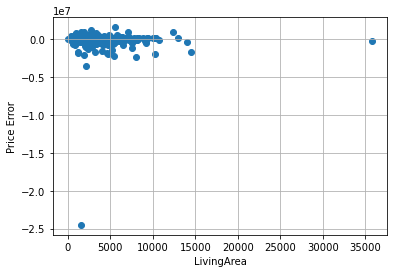

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(x=X['livingArea'], y=e)
plt.xlabel('LivingArea')
plt.ylabel('Price Error')
plt.grid('on')

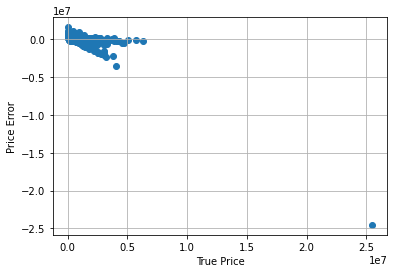

In [ ]:
from matplotlib import pyplot as plt
import seaborn
plt.scatter(x=y, y=e)
plt.xlabel('True Price')
plt.ylabel('Price Error')
plt.grid('on')

Outliers are distracting our model and causing us to underestimate home prices the more expensive they are.

<AxesSubplot:>

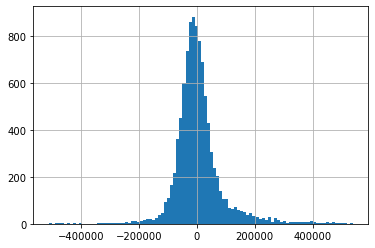

In [ ]:
e_all = e
e = e_all[(e < 2*rmse) & (e > -2 * rmse )]
plt.xlabel('Price Error')
plt.ylabel('Count of Homes')
e.hist(bins=100)

In [ ]:
df_features = df[feature_colnames].fillna(0).copy()
df_features = pd.concat([df_features, df_feature_isna], axis=1)
X = df_features
y = df[target]

model = LinearRegression()
model.fit(X=X, y=y)

y_pred = model.predict(X)
e = y_pred - y
rmse = np.sqrt(np.mean(e**2))

experiments.append(dict(
    fillna=0,
    model=model.__class__.__name__,
    numfeats=len(X.columns),
    rmse=rmse,
    ))
pd.DataFrame(experiments).sort_values("rmse").round()

fillna             model  numfeats      rmse isna_features
0   mean  LinearRegression        64  275377.0           NaN
1   mean  LinearRegression       124  274313.0          True
2      0  LinearRegression       124  275578.0           NaN
3      0  LinearRegression       124  275578.0           NaN

In [ ]:
experiments

[{'fillna': 'mean',
  'model': 'LinearRegression',
  'numfeats': 64,
  'rmse': 275377.0024181652},
 {'fillna': 'mean',
  'isna_features': True,
  'model': 'LinearRegression',
  'numfeats': 124,
  'rmse': 274313.2523525388},
 {'fillna': 0,
  'model': 'LinearRegression',
  'numfeats': 124,
  'rmse': 275578.16584448674},
 {'fillna': 0,
  'model': 'LinearRegression',
  'numfeats': 124,
  'rmse': 275578.16584448674},
 {'model': 'LinearRegression', 'numfeats': 124, 'rmse': 275578.16584448674}]

In [ ]:
df_experiments = pd.DataFrame(experiments)
df_experiments

fillna             model  numfeats           rmse isna_features
0   mean  LinearRegression        64  275377.002418           NaN
1   mean  LinearRegression       124  274313.252353          True
2      0  LinearRegression       124  275578.165844           NaN
3      0  LinearRegression       124  275578.165844           NaN
4    NaN  LinearRegression       124  275578.165844           NaN

Is RMSE the same as Standard Deviation of the Error (Standard Error)?

In [ ]:
pd.Series([rmse, e.std(), rmse - e.std()], index=' rmse, e.std(), rmse - e.std()'.split(',')).round()

 rmse              275578.0
 e.std()           275592.0
 rmse - e.std()       -14.0
dtype: float64

In [ ]:
X['livingArea_lt_20'] = x < 20
X

In [ ]:
model = LinearRegression()
model.fit(X=X, y=y)
y_pred = model.predict(X)
e = y_pred - y
rmse = np.sqrt(np.mean(e**2))
experiments.append(dict(
    model=model.__class__.__name__,
    numfeats=len(X.columns),
    rmse=rmse,
    ))
df_experiments = pd.DataFrame(experiments)
df_experiments

In [ ]:
model.coef_


In [ ]:
pd.Series(model.coef_, index=X.columns)